In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv(r"/home/jabir-ali/code/dataanalysis/hospitalAdmissionData/HospitalAdmissionData/HDHI Admission data.csv")
df2 = pd.read_csv(r"/home/jabir-ali/code/dataanalysis/hospitalAdmissionData/HospitalAdmissionData/table_headings.csv")

In [3]:
df2.isnull().sum()

Table Heading                                    0
 Explanatory Name                                0
                                                 0
 .1                                              0
 .2                                              0
 .3                                              0
 .4                                              0
dtype: int64

In [4]:
df1.head(10)


,SNO,MRD No.,D.O.A,D.O.D,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,...,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,1,234735,4/1/2017,4/3/2017,81,M,R,E,Apr-17,3,...,0,0,0,0,0,0,0,0,0,0
1,2,234696,4/1/2017,4/5/2017,65,M,R,E,Apr-17,5,...,0,0,0,0,0,0,0,0,0,0
2,3,234882,4/1/2017,4/3/2017,53,M,U,E,Apr-17,3,...,0,0,0,0,0,0,0,0,0,0
3,4,234635,4/1/2017,4/8/2017,67,F,U,E,Apr-17,8,...,0,0,0,0,0,0,0,0,0,0
4,5,234486,4/1/2017,4/23/2017,60,F,U,E,Apr-17,23,...,0,0,0,0,0,0,0,0,0,0
5,6,234675,4/1/2017,4/10/2017,44,M,U,E,Apr-17,10,...,0,0,0,0,0,0,0,0,0,0
6,7,234563,4/1/2017,4/6/2017,56,F,U,E,Apr-17,6,...,0,0,0,0,0,0,0,0,0,0
7,8,208455,4/1/2017,4/13/2017,47,M,U,E,Apr-17,13,...,0,0,0,0,0,0,0,0,0,0
8,9,67070,4/1/2017,4/3/2017,65,F,U,E,Apr-17,3,...,0,0,0,0,0,0,0,1,0,0
9,10,153218,4/1/2017,4/3/2017,59,M,U,E,Apr-17,3,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df2.head()

,Table Heading,Explanatory Name,,.1,.2,.3,.4
0,SNO,Serial Number,,,,,
1,MRD No.,Admission Number,,,,,
2,D.O.A,Date of Admission,,,,,
3,D.O.D,Date of Discharge,,,,,
4,AGE,AGE,,,,,


In [6]:
# strip for any white space 
df2.columns = df2.columns.str.strip()
df1.columns = df1.columns.str.strip()

In [7]:
# dropping the null columns and taking only the necessary 
# here we filter for the two columns we need explicitly in a dataframe format.
df2 = df2[['Table Heading', 'Explanatory Name']]

In [8]:
# returns a series where 'Table Heading' acts as an index and 'Explatory Name' acts as the value
df3 = df2.set_index('Table Heading')['Explanatory Name']

In [9]:
df3

Table Heading
SNO                                 Serial Number                               
MRD No.                             Admission Number                            
D.O.A                               Date of Admission                           
D.O.D                               Date of Discharge                           
AGE                                 AGE                                         
GENDER                              GENDER                                      
RURAL                               RURAL(R) /Urban(U)                          
TYPE OF ADMISSION-EMERGENCY/OPD     TYPE OF ADMISSION-EMERGENCY/OPD             
month year                          month year                                  
DURATION OF STAY                    DURATION OF STAY                            
duration of intensive unit stay     duration of intensive unit stay             
OUTCOME                             OUTCOME                                     
SMOKING       

In [10]:
df3.head()

Table Heading
SNO                                 Serial Number                               
MRD No.                             Admission Number                            
D.O.A                               Date of Admission                           
D.O.D                               Date of Discharge                           
AGE                                 AGE                                         
Name: Explanatory Name, dtype: object

In [11]:
# turning the heading dataset into adictionary with key value pairs
# df3 = df2.set_index('Table Heading')['Explanatory Name'].to_dict()
df3 = df2.set_index('Table Heading')['Explanatory Name'].to_dict()

In [12]:
# A dictionary that will provides mapping of old column names to new ones in the main dataframe(df1)
df3

{'SNO                            ': ' Serial Number                               ',
 'MRD No.                        ': ' Admission Number                            ',
 'D.O.A                          ': ' Date of Admission                           ',
 'D.O.D                          ': ' Date of Discharge                           ',
 'AGE                            ': ' AGE                                         ',
 'GENDER                         ': ' GENDER                                      ',
 'RURAL                          ': ' RURAL(R) /Urban(U)                          ',
 'TYPE OF ADMISSION-EMERGENCY/OPD': ' TYPE OF ADMISSION-EMERGENCY/OPD             ',
 'month year                     ': ' month year                                  ',
 'DURATION OF STAY               ': ' DURATION OF STAY                            ',
 'duration of intensive unit stay': ' duration of intensive unit stay             ',
 'OUTCOME                        ': ' OUTCOME                    

In [13]:
# after turning the dataframe into a dictionary we strip it again 
df3 = {k.strip(): v for k, v in df3.items()}

In [14]:
df1.columns

Index(['SNO', 'MRD No.', 'D.O.A', 'D.O.D', 'AGE', 'GENDER', 'RURAL',
       'TYPE OF ADMISSION-EMERGENCY/OPD', 'month year', 'DURATION OF STAY',
       'duration of intensive unit stay', 'OUTCOME', 'SMOKING', 'ALCOHOL',
       'DM', 'HTN', 'CAD', 'PRIOR CMP', 'CKD', 'HB', 'TLC', 'PLATELETS',
       'GLUCOSE', 'UREA', 'CREATININE', 'BNP', 'RAISED CARDIAC ENZYMES', 'EF',
       'SEVERE ANAEMIA', 'ANAEMIA', 'STABLE ANGINA', 'ACS', 'STEMI',
       'ATYPICAL CHEST PAIN', 'HEART FAILURE', 'HFREF', 'HFNEF', 'VALVULAR',
       'CHB', 'SSS', 'AKI', 'CVA INFRACT', 'CVA BLEED', 'AF', 'VT', 'PSVT',
       'CONGENITAL', 'UTI', 'NEURO CARDIOGENIC SYNCOPE', 'ORTHOSTATIC',
       'INFECTIVE ENDOCARDITIS', 'DVT', 'CARDIOGENIC SHOCK', 'SHOCK',
       'PULMONARY EMBOLISM', 'CHEST INFECTION'],
      dtype='object')

In [15]:
print(type(df3))
print(type(df1))
print(list(df3.items())[:5])


<class 'dict'>
<class 'pandas.core.frame.DataFrame'>
[('SNO', ' Serial Number                               '), ('MRD No.', ' Admission Number                            '), ('D.O.A', ' Date of Admission                           '), ('D.O.D', ' Date of Discharge                           '), ('AGE', ' AGE                                         ')]


In [16]:
df1.isnull().sum()

SNO                                0
MRD No.                            0
D.O.A                              0
D.O.D                              0
AGE                                0
GENDER                             0
RURAL                              0
TYPE OF ADMISSION-EMERGENCY/OPD    0
month year                         0
DURATION OF STAY                   0
duration of intensive unit stay    0
OUTCOME                            0
SMOKING                            0
ALCOHOL                            0
DM                                 0
HTN                                0
CAD                                0
PRIOR CMP                          0
CKD                                0
HB                                 0
TLC                                0
PLATELETS                          0
GLUCOSE                            0
UREA                               0
CREATININE                         0
BNP                                0
RAISED CARDIAC ENZYMES             0
E

In [17]:
# .rename() -> renames columns in df1 according to the mapping provided bythe mapping in the dictionary of df3
df4 = df1.rename(columns=df3)

In [18]:
df4.head()

,Serial Number,Admission Number,Date of Admission,Date of Discharge,AGE,GENDER,RURAL(R) /Urban(U),TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,...,Congenital Heart Disease,Urinary tract infection,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,Deep venous thrombosis,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,1,234735,4/1/2017,4/3/2017,81,M,R,E,Apr-17,3,...,0,0,0,0,0,0,0,0,0,0
1,2,234696,4/1/2017,4/5/2017,65,M,R,E,Apr-17,5,...,0,0,0,0,0,0,0,0,0,0
2,3,234882,4/1/2017,4/3/2017,53,M,U,E,Apr-17,3,...,0,0,0,0,0,0,0,0,0,0
3,4,234635,4/1/2017,4/8/2017,67,F,U,E,Apr-17,8,...,0,0,0,0,0,0,0,0,0,0
4,5,234486,4/1/2017,4/23/2017,60,F,U,E,Apr-17,23,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# checking for sum of null values in every column
df4.isnull().sum()

Serial Number                                   0
Admission Number                                0
Date of Admission                               0
Date of Discharge                               0
AGE                                             0
GENDER                                          0
RURAL(R) /Urban(U)                              0
TYPE OF ADMISSION-EMERGENCY/OPD                 0
month year                                      0
DURATION OF STAY                                0
duration of intensive unit stay                 0
OUTCOME                                         0
SMOKING                                         0
ALCOHOL                                         0
Diabetes Mellitus                               0
Hypertension                                    0
Coronary Artery Disease                         0
CARDIOMYOPATHY                                  0
CHRONIC KIDNEY DISEASE                          0
Haemoglobin                                     0


In [20]:
# strips the column headings of any whitespace
df4.columns = df4.columns.str.strip()
# strips every value with all the columns 
df4 = df4.applymap(lambda x: x.strip() if isinstance(x, str) else x)

/tmp/ipykernel_920716/3198953845.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df4 = df4.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [21]:
# df4.set_index('GENDER').to_dict()
# df4[['GENDER']].to_dict('records')
# discovered there is no need for the above lines 

In [22]:
# Replacing them using .replace()
df4['GENDER'] = df4['GENDER'].replace({'M':'MALE', 'F':'FEMALE'})

In [23]:
df4

,Serial Number,Admission Number,Date of Admission,Date of Discharge,AGE,GENDER,RURAL(R) /Urban(U),TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,...,Congenital Heart Disease,Urinary tract infection,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,Deep venous thrombosis,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,1,234735,4/1/2017,4/3/2017,81,MALE,R,E,Apr-17,3,...,0,0,0,0,0,0,0,0,0,0
1,2,234696,4/1/2017,4/5/2017,65,MALE,R,E,Apr-17,5,...,0,0,0,0,0,0,0,0,0,0
2,3,234882,4/1/2017,4/3/2017,53,MALE,U,E,Apr-17,3,...,0,0,0,0,0,0,0,0,0,0
3,4,234635,4/1/2017,4/8/2017,67,FEMALE,U,E,Apr-17,8,...,0,0,0,0,0,0,0,0,0,0
4,5,234486,4/1/2017,4/23/2017,60,FEMALE,U,E,Apr-17,23,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15752,15753,699585,31/03/2019,04/04/2019,86,FEMALE,U,O,Mar-19,5,...,0,0,0,0,0,0,0,0,0,0
15753,15754,699500,3/31/2019,4/1/2019,50,MALE,R,E,Mar-19,2,...,0,0,0,0,0,0,0,0,0,0
15754,15755,700415,31/03/2019,09/04/2019,82,MALE,U,E,Mar-19,10,...,0,0,0,0,0,0,0,0,0,0
15755,15756,699524,31/03/2019,03/04/2019,59,FEMALE,U,O,Mar-19,4,...,0,0,0,0,0,0,0,0,0,0


In [24]:
#
# df4['RURAL(R)/Urban(U)'] = df4.rename(columns = {'RURAL(R)/Urban(U)':'LOCALITY'})
# df4 = df4.rename(columns={'RURAL(R)/Urban(U)': 'LOCALITY'})


In [25]:
# df4[['RURAL(R) /Urban(U)']].to_dict('records')
# this one too is useless here

In [26]:
df4['RURAL(R) /Urban(U)'] = df4['RURAL(R) /Urban(U)'].replace({'R':'RURAL', 'U':'URBAN'})

In [27]:
df4.rename(columns = {'RURAL(R) /Urban(U)':'LOCALITY'}, inplace=True)

In [28]:
df4

,Serial Number,Admission Number,Date of Admission,Date of Discharge,AGE,GENDER,LOCALITY,TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,...,Congenital Heart Disease,Urinary tract infection,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,Deep venous thrombosis,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,1,234735,4/1/2017,4/3/2017,81,MALE,RURAL,E,Apr-17,3,...,0,0,0,0,0,0,0,0,0,0
1,2,234696,4/1/2017,4/5/2017,65,MALE,RURAL,E,Apr-17,5,...,0,0,0,0,0,0,0,0,0,0
2,3,234882,4/1/2017,4/3/2017,53,MALE,URBAN,E,Apr-17,3,...,0,0,0,0,0,0,0,0,0,0
3,4,234635,4/1/2017,4/8/2017,67,FEMALE,URBAN,E,Apr-17,8,...,0,0,0,0,0,0,0,0,0,0
4,5,234486,4/1/2017,4/23/2017,60,FEMALE,URBAN,E,Apr-17,23,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15752,15753,699585,31/03/2019,04/04/2019,86,FEMALE,URBAN,O,Mar-19,5,...,0,0,0,0,0,0,0,0,0,0
15753,15754,699500,3/31/2019,4/1/2019,50,MALE,RURAL,E,Mar-19,2,...,0,0,0,0,0,0,0,0,0,0
15754,15755,700415,31/03/2019,09/04/2019,82,MALE,URBAN,E,Mar-19,10,...,0,0,0,0,0,0,0,0,0,0
15755,15756,699524,31/03/2019,03/04/2019,59,FEMALE,URBAN,O,Mar-19,4,...,0,0,0,0,0,0,0,0,0,0


In [29]:
df4.columns

Index(['Serial Number', 'Admission Number', 'Date of Admission',
       'Date of Discharge', 'AGE', 'GENDER', 'LOCALITY',
       'TYPE OF ADMISSION-EMERGENCY/OPD', 'month year', 'DURATION OF STAY',
       'duration of intensive unit stay', 'OUTCOME', 'SMOKING', 'ALCOHOL',
       'Diabetes Mellitus', 'Hypertension', 'Coronary Artery Disease',
       'CARDIOMYOPATHY', 'CHRONIC KIDNEY DISEASE', 'Haemoglobin',
       'TOTAL LEUKOCYTES COUNT', 'PLATELETS', 'GLUCOSE', 'UREA', 'CREATININE',
       'B-TYPE NATRIURETIC PEPTIDE', 'RAISED CARDIAC ENZYMES',
       'Ejection Fraction', 'SEVERE ANAEMIA', 'ANAEMIA', 'STABLE ANGINA',
       'Acute coronary Syndrome', 'ST ELEVATION MYOCARDIAL INFARCTION',
       'ATYPICAL CHEST PAIN', 'HEART FAILURE',
       'HEART FAILURE WITH REDUCED EJECTION FRACTION',
       'HEART FAILURE WITH NORMAL EJECTION FRACTION', 'Valvular Heart Disease',
       'Complete Heart Block', 'Sick sinus syndrome', 'ACUTE KIDNEY INJURY',
       'Cerebrovascular Accident INFRACT', 

In [30]:
df4[['TYPE OF ADMISSION-EMERGENCY/OPD']].to_dict('records')


[{'TYPE OF ADMISSION-EMERGENCY/OPD': 'E'},
 {'TYPE OF ADMISSION-EMERGENCY/OPD': 'E'},
 {'TYPE OF ADMISSION-EMERGENCY/OPD': 'E'},
 {'TYPE OF ADMISSION-EMERGENCY/OPD': 'E'},
 {'TYPE OF ADMISSION-EMERGENCY/OPD': 'E'},
 {'TYPE OF ADMISSION-EMERGENCY/OPD': 'E'},
 {'TYPE OF ADMISSION-EMERGENCY/OPD': 'E'},
 {'TYPE OF ADMISSION-EMERGENCY/OPD': 'E'},
 {'TYPE OF ADMISSION-EMERGENCY/OPD': 'E'},
 {'TYPE OF ADMISSION-EMERGENCY/OPD': 'E'},
 {'TYPE OF ADMISSION-EMERGENCY/OPD': 'E'},
 {'TYPE OF ADMISSION-EMERGENCY/OPD': 'E'},
 {'TYPE OF ADMISSION-EMERGENCY/OPD': 'E'},
 {'TYPE OF ADMISSION-EMERGENCY/OPD': 'E'},
 {'TYPE OF ADMISSION-EMERGENCY/OPD': 'O'},
 {'TYPE OF ADMISSION-EMERGENCY/OPD': 'O'},
 {'TYPE OF ADMISSION-EMERGENCY/OPD': 'O'},
 {'TYPE OF ADMISSION-EMERGENCY/OPD': 'O'},
 {'TYPE OF ADMISSION-EMERGENCY/OPD': 'O'},
 {'TYPE OF ADMISSION-EMERGENCY/OPD': 'E'},
 {'TYPE OF ADMISSION-EMERGENCY/OPD': 'E'},
 {'TYPE OF ADMISSION-EMERGENCY/OPD': 'E'},
 {'TYPE OF ADMISSION-EMERGENCY/OPD': 'E'},
 {'TYPE OF 

In [31]:
df4['TYPE OF ADMISSION-EMERGENCY/OPD']=  df4['TYPE OF ADMISSION-EMERGENCY/OPD'].replace({'E':'EMERGENCY', 'O':'OUTPATIENT'})

In [32]:
df4


,Serial Number,Admission Number,Date of Admission,Date of Discharge,AGE,GENDER,LOCALITY,TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,...,Congenital Heart Disease,Urinary tract infection,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,Deep venous thrombosis,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,1,234735,4/1/2017,4/3/2017,81,MALE,RURAL,EMERGENCY,Apr-17,3,...,0,0,0,0,0,0,0,0,0,0
1,2,234696,4/1/2017,4/5/2017,65,MALE,RURAL,EMERGENCY,Apr-17,5,...,0,0,0,0,0,0,0,0,0,0
2,3,234882,4/1/2017,4/3/2017,53,MALE,URBAN,EMERGENCY,Apr-17,3,...,0,0,0,0,0,0,0,0,0,0
3,4,234635,4/1/2017,4/8/2017,67,FEMALE,URBAN,EMERGENCY,Apr-17,8,...,0,0,0,0,0,0,0,0,0,0
4,5,234486,4/1/2017,4/23/2017,60,FEMALE,URBAN,EMERGENCY,Apr-17,23,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15752,15753,699585,31/03/2019,04/04/2019,86,FEMALE,URBAN,OUTPATIENT,Mar-19,5,...,0,0,0,0,0,0,0,0,0,0
15753,15754,699500,3/31/2019,4/1/2019,50,MALE,RURAL,EMERGENCY,Mar-19,2,...,0,0,0,0,0,0,0,0,0,0
15754,15755,700415,31/03/2019,09/04/2019,82,MALE,URBAN,EMERGENCY,Mar-19,10,...,0,0,0,0,0,0,0,0,0,0
15755,15756,699524,31/03/2019,03/04/2019,59,FEMALE,URBAN,OUTPATIENT,Mar-19,4,...,0,0,0,0,0,0,0,0,0,0


In [33]:
df4.columns

Index(['Serial Number', 'Admission Number', 'Date of Admission',
       'Date of Discharge', 'AGE', 'GENDER', 'LOCALITY',
       'TYPE OF ADMISSION-EMERGENCY/OPD', 'month year', 'DURATION OF STAY',
       'duration of intensive unit stay', 'OUTCOME', 'SMOKING', 'ALCOHOL',
       'Diabetes Mellitus', 'Hypertension', 'Coronary Artery Disease',
       'CARDIOMYOPATHY', 'CHRONIC KIDNEY DISEASE', 'Haemoglobin',
       'TOTAL LEUKOCYTES COUNT', 'PLATELETS', 'GLUCOSE', 'UREA', 'CREATININE',
       'B-TYPE NATRIURETIC PEPTIDE', 'RAISED CARDIAC ENZYMES',
       'Ejection Fraction', 'SEVERE ANAEMIA', 'ANAEMIA', 'STABLE ANGINA',
       'Acute coronary Syndrome', 'ST ELEVATION MYOCARDIAL INFARCTION',
       'ATYPICAL CHEST PAIN', 'HEART FAILURE',
       'HEART FAILURE WITH REDUCED EJECTION FRACTION',
       'HEART FAILURE WITH NORMAL EJECTION FRACTION', 'Valvular Heart Disease',
       'Complete Heart Block', 'Sick sinus syndrome', 'ACUTE KIDNEY INJURY',
       'Cerebrovascular Accident INFRACT', 

In [34]:
df4[['month year']].to_dict('records')


[{'month year': 'Apr-17'},
 {'month year': 'Apr-17'},
 {'month year': 'Apr-17'},
 {'month year': 'Apr-17'},
 {'month year': 'Apr-17'},
 {'month year': 'Apr-17'},
 {'month year': 'Apr-17'},
 {'month year': 'Apr-17'},
 {'month year': 'Apr-17'},
 {'month year': 'Apr-17'},
 {'month year': 'Apr-17'},
 {'month year': 'Apr-17'},
 {'month year': 'Apr-17'},
 {'month year': 'Apr-17'},
 {'month year': 'Apr-17'},
 {'month year': 'Apr-17'},
 {'month year': 'Apr-17'},
 {'month year': 'Apr-17'},
 {'month year': 'Apr-17'},
 {'month year': 'Apr-17'},
 {'month year': 'Apr-17'},
 {'month year': 'Apr-17'},
 {'month year': 'Apr-17'},
 {'month year': 'Apr-17'},
 {'month year': 'Apr-17'},
 {'month year': 'Apr-17'},
 {'month year': 'Apr-17'},
 {'month year': 'Apr-17'},
 {'month year': 'Apr-17'},
 {'month year': 'Apr-17'},
 {'month year': 'Apr-17'},
 {'month year': 'Apr-17'},
 {'month year': 'Apr-17'},
 {'month year': 'Apr-17'},
 {'month year': 'Apr-17'},
 {'month year': 'Apr-17'},
 {'month year': 'Apr-17'},
 

In [35]:
df4['month year'].unique()

array(['Apr-17', 'May-17', 'Jun-17', 'Jul-17', 'Aug-17', 'Sep-17',
       'Oct-17', 'Nov-17', 'Dec-17', 'Jan-18', 'Feb-18', 'Mar-18',
       'Apr-18', 'May-18', 'Jun-18', 'Jul-18', 'Aug-18', 'Sep-18',
       'Oct-18', 'Nov-18', 'Dec-18', 'Jan-19', 'Feb-19', 'Mar-19'],
      dtype=object)

In [36]:

df4['month year'] = (
    pd.to_datetime(df4['month year'], format='%b-%y')
    .dt.strftime('%Y-%B')
)


In [37]:
#The code below doesnt work due to a slight error in the order i put the dates in and the order they in 
# df4['month year'] = df4['month year'].replace({'17-Apr' : '2017-April', '17-May' : '2017-May', '17-Jun' : '2017-June', '17-Jul' : '2017-July', '17-Aug' : '2017-August', '17-Sep' : '2017-September',
#        '17-Oct' : '2017-October', '17-Nov' : '2017-November', '17-Dec' : '2017-December', '18-Jan' : '2018-January', '18-Feb' : '2018-Febuary', '18-Mar' : '2018-March',
#        '18-Apr' : '2018-April', '18-May' : '2018-May', '18-Jun' : '2018-June', '18-Jul' : '2018-July', '18-Aug' : '2018-August', '18-Sep' : '2018-September',
#        '18-Oct' : '2018-October', '18-Nov' : '2018-November', '18-Dec' : '2018-December', '19-Jan' : '2019-January', '19-Feb' : '2019-Febuary', '19-Mar' : '2019-March'})


In [38]:
df4

,Serial Number,Admission Number,Date of Admission,Date of Discharge,AGE,GENDER,LOCALITY,TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,...,Congenital Heart Disease,Urinary tract infection,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,Deep venous thrombosis,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,1,234735,4/1/2017,4/3/2017,81,MALE,RURAL,EMERGENCY,2017-April,3,...,0,0,0,0,0,0,0,0,0,0
1,2,234696,4/1/2017,4/5/2017,65,MALE,RURAL,EMERGENCY,2017-April,5,...,0,0,0,0,0,0,0,0,0,0
2,3,234882,4/1/2017,4/3/2017,53,MALE,URBAN,EMERGENCY,2017-April,3,...,0,0,0,0,0,0,0,0,0,0
3,4,234635,4/1/2017,4/8/2017,67,FEMALE,URBAN,EMERGENCY,2017-April,8,...,0,0,0,0,0,0,0,0,0,0
4,5,234486,4/1/2017,4/23/2017,60,FEMALE,URBAN,EMERGENCY,2017-April,23,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15752,15753,699585,31/03/2019,04/04/2019,86,FEMALE,URBAN,OUTPATIENT,2019-March,5,...,0,0,0,0,0,0,0,0,0,0
15753,15754,699500,3/31/2019,4/1/2019,50,MALE,RURAL,EMERGENCY,2019-March,2,...,0,0,0,0,0,0,0,0,0,0
15754,15755,700415,31/03/2019,09/04/2019,82,MALE,URBAN,EMERGENCY,2019-March,10,...,0,0,0,0,0,0,0,0,0,0
15755,15756,699524,31/03/2019,03/04/2019,59,FEMALE,URBAN,OUTPATIENT,2019-March,4,...,0,0,0,0,0,0,0,0,0,0


In [39]:
df4.rename(columns={'month year': 'year month'}, inplace=True)

In [40]:
df4

,Serial Number,Admission Number,Date of Admission,Date of Discharge,AGE,GENDER,LOCALITY,TYPE OF ADMISSION-EMERGENCY/OPD,year month,DURATION OF STAY,...,Congenital Heart Disease,Urinary tract infection,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,Deep venous thrombosis,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,1,234735,4/1/2017,4/3/2017,81,MALE,RURAL,EMERGENCY,2017-April,3,...,0,0,0,0,0,0,0,0,0,0
1,2,234696,4/1/2017,4/5/2017,65,MALE,RURAL,EMERGENCY,2017-April,5,...,0,0,0,0,0,0,0,0,0,0
2,3,234882,4/1/2017,4/3/2017,53,MALE,URBAN,EMERGENCY,2017-April,3,...,0,0,0,0,0,0,0,0,0,0
3,4,234635,4/1/2017,4/8/2017,67,FEMALE,URBAN,EMERGENCY,2017-April,8,...,0,0,0,0,0,0,0,0,0,0
4,5,234486,4/1/2017,4/23/2017,60,FEMALE,URBAN,EMERGENCY,2017-April,23,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15752,15753,699585,31/03/2019,04/04/2019,86,FEMALE,URBAN,OUTPATIENT,2019-March,5,...,0,0,0,0,0,0,0,0,0,0
15753,15754,699500,3/31/2019,4/1/2019,50,MALE,RURAL,EMERGENCY,2019-March,2,...,0,0,0,0,0,0,0,0,0,0
15754,15755,700415,31/03/2019,09/04/2019,82,MALE,URBAN,EMERGENCY,2019-March,10,...,0,0,0,0,0,0,0,0,0,0
15755,15756,699524,31/03/2019,03/04/2019,59,FEMALE,URBAN,OUTPATIENT,2019-March,4,...,0,0,0,0,0,0,0,0,0,0


In [41]:
# makes pandas display all of the columns rather than ...
pd.set_option('display.max_columns', None)

In [42]:
df4['CHEST INFECTION'].unique()

array(['0', '1', '\\'], dtype=object)

In [43]:
print(df4['CHEST INFECTION'].dtype) #checks the type


object


In [44]:
# convert it to numeric value 
df4['CHEST INFECTION'] = pd.to_numeric(df4['CHEST INFECTION'], errors = 'coerce')

In [45]:
# checks values equal to 0
(df4['CHEST INFECTION'] == 0 ).sum()

np.int64(15415)

In [46]:
# checks values that are empty/nan
df4['CHEST INFECTION'].isnull().sum()

np.int64(1)

In [47]:
# checks values equal to 1
(df4['CHEST INFECTION'] == 1 ).sum()

np.int64(341)

In [48]:
df4['CHEST INFECTION'].unique()

array([ 0.,  1., nan])

In [49]:
df4.head()

,Serial Number,Admission Number,Date of Admission,Date of Discharge,AGE,GENDER,LOCALITY,TYPE OF ADMISSION-EMERGENCY/OPD,year month,DURATION OF STAY,duration of intensive unit stay,OUTCOME,SMOKING,ALCOHOL,Diabetes Mellitus,Hypertension,Coronary Artery Disease,CARDIOMYOPATHY,CHRONIC KIDNEY DISEASE,Haemoglobin,TOTAL LEUKOCYTES COUNT,PLATELETS,GLUCOSE,UREA,CREATININE,B-TYPE NATRIURETIC PEPTIDE,RAISED CARDIAC ENZYMES,Ejection Fraction,SEVERE ANAEMIA,ANAEMIA,STABLE ANGINA,Acute coronary Syndrome,ST ELEVATION MYOCARDIAL INFARCTION,ATYPICAL CHEST PAIN,HEART FAILURE,HEART FAILURE WITH REDUCED EJECTION FRACTION,HEART FAILURE WITH NORMAL EJECTION FRACTION,Valvular Heart Disease,Complete Heart Block,Sick sinus syndrome,ACUTE KIDNEY INJURY,Cerebrovascular Accident INFRACT,Cerebrovascular Accident BLEED,Atrial Fibrilation,Ventricular Tachycardia,PAROXYSMAL SUPRA VENTRICULAR TACHYCARDIA,Congenital Heart Disease,Urinary tract infection,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,Deep venous thrombosis,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,1,234735,4/1/2017,4/3/2017,81,MALE,RURAL,EMERGENCY,2017-April,3,2,DISCHARGE,0,0,1,0,0,0,0,9.5,16.1,337,80,34,0.9,1880,1,35,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1,2,234696,4/1/2017,4/5/2017,65,MALE,RURAL,EMERGENCY,2017-April,5,2,DISCHARGE,0,1,0,1,1,0,0,13.7,9,149,112,18,0.9,,0,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0
2,3,234882,4/1/2017,4/3/2017,53,MALE,URBAN,EMERGENCY,2017-April,3,3,DISCHARGE,0,0,1,0,1,0,0,10.6,14.7,329,187,93,2.3,210,0,,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
3,4,234635,4/1/2017,4/8/2017,67,FEMALE,URBAN,EMERGENCY,2017-April,8,6,DISCHARGE,0,0,0,1,1,0,0,12.8,9.9,286,130,27,0.6,,0,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
4,5,234486,4/1/2017,4/23/2017,60,FEMALE,URBAN,EMERGENCY,2017-April,23,9,DISCHARGE,0,0,0,1,0,1,0,13.6,9.1,26,144,55,1.25,1840,0,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


In [50]:
df4.tail()

,Serial Number,Admission Number,Date of Admission,Date of Discharge,AGE,GENDER,LOCALITY,TYPE OF ADMISSION-EMERGENCY/OPD,year month,DURATION OF STAY,duration of intensive unit stay,OUTCOME,SMOKING,ALCOHOL,Diabetes Mellitus,Hypertension,Coronary Artery Disease,CARDIOMYOPATHY,CHRONIC KIDNEY DISEASE,Haemoglobin,TOTAL LEUKOCYTES COUNT,PLATELETS,GLUCOSE,UREA,CREATININE,B-TYPE NATRIURETIC PEPTIDE,RAISED CARDIAC ENZYMES,Ejection Fraction,SEVERE ANAEMIA,ANAEMIA,STABLE ANGINA,Acute coronary Syndrome,ST ELEVATION MYOCARDIAL INFARCTION,ATYPICAL CHEST PAIN,HEART FAILURE,HEART FAILURE WITH REDUCED EJECTION FRACTION,HEART FAILURE WITH NORMAL EJECTION FRACTION,Valvular Heart Disease,Complete Heart Block,Sick sinus syndrome,ACUTE KIDNEY INJURY,Cerebrovascular Accident INFRACT,Cerebrovascular Accident BLEED,Atrial Fibrilation,Ventricular Tachycardia,PAROXYSMAL SUPRA VENTRICULAR TACHYCARDIA,Congenital Heart Disease,Urinary tract infection,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,Deep venous thrombosis,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
15752,15753,699585,31/03/2019,04/04/2019,86,FEMALE,URBAN,OUTPATIENT,2019-March,5,1,DISCHARGE,0,0,1,1,1,0,0,8.8,13.7,361,131,57,1.4,292,1,38,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
15753,15754,699500,3/31/2019,4/1/2019,50,MALE,RURAL,EMERGENCY,2019-March,2,2,EXPIRY,0,0,1,1,0,1,0,13.2,15.6,142,248,94,1.8,206,0,28,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
15754,15755,700415,31/03/2019,09/04/2019,82,MALE,URBAN,EMERGENCY,2019-March,10,5,DISCHARGE,0,0,0,1,1,0,0,9.3,11.7,372,210,67,1.9,1120,0,32,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
15755,15756,699524,31/03/2019,03/04/2019,59,FEMALE,URBAN,OUTPATIENT,2019-March,4,2,DISCHARGE,0,0,0,1,1,0,0,13.1,12.5,431,153,29,0.8,78,0,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
15756,15757,699524,31/03/2019,03/04/2019,59,FEMALE,URBAN,OUTPATIENT,2019-March,4,2,DISCHARGE,0,0,0,1,1,0,0,13.1,12.5,431,153,29,0.8,78,0,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


In [51]:
df4.to_csv("Updated_Hospital_Admission_Data.csv", index=False )

In [52]:
df4

,Serial Number,Admission Number,Date of Admission,Date of Discharge,AGE,GENDER,LOCALITY,TYPE OF ADMISSION-EMERGENCY/OPD,year month,DURATION OF STAY,duration of intensive unit stay,OUTCOME,SMOKING,ALCOHOL,Diabetes Mellitus,Hypertension,Coronary Artery Disease,CARDIOMYOPATHY,CHRONIC KIDNEY DISEASE,Haemoglobin,TOTAL LEUKOCYTES COUNT,PLATELETS,GLUCOSE,UREA,CREATININE,B-TYPE NATRIURETIC PEPTIDE,RAISED CARDIAC ENZYMES,Ejection Fraction,SEVERE ANAEMIA,ANAEMIA,STABLE ANGINA,Acute coronary Syndrome,ST ELEVATION MYOCARDIAL INFARCTION,ATYPICAL CHEST PAIN,HEART FAILURE,HEART FAILURE WITH REDUCED EJECTION FRACTION,HEART FAILURE WITH NORMAL EJECTION FRACTION,Valvular Heart Disease,Complete Heart Block,Sick sinus syndrome,ACUTE KIDNEY INJURY,Cerebrovascular Accident INFRACT,Cerebrovascular Accident BLEED,Atrial Fibrilation,Ventricular Tachycardia,PAROXYSMAL SUPRA VENTRICULAR TACHYCARDIA,Congenital Heart Disease,Urinary tract infection,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,Deep venous thrombosis,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,1,234735,4/1/2017,4/3/2017,81,MALE,RURAL,EMERGENCY,2017-April,3,2,DISCHARGE,0,0,1,0,0,0,0,9.5,16.1,337,80,34,0.9,1880,1,35,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1,2,234696,4/1/2017,4/5/2017,65,MALE,RURAL,EMERGENCY,2017-April,5,2,DISCHARGE,0,1,0,1,1,0,0,13.7,9,149,112,18,0.9,,0,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0
2,3,234882,4/1/2017,4/3/2017,53,MALE,URBAN,EMERGENCY,2017-April,3,3,DISCHARGE,0,0,1,0,1,0,0,10.6,14.7,329,187,93,2.3,210,0,,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
3,4,234635,4/1/2017,4/8/2017,67,FEMALE,URBAN,EMERGENCY,2017-April,8,6,DISCHARGE,0,0,0,1,1,0,0,12.8,9.9,286,130,27,0.6,,0,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
4,5,234486,4/1/2017,4/23/2017,60,FEMALE,URBAN,EMERGENCY,2017-April,23,9,DISCHARGE,0,0,0,1,0,1,0,13.6,9.1,26,144,55,1.25,1840,0,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15752,15753,699585,31/03/2019,04/04/2019,86,FEMALE,URBAN,OUTPATIENT,2019-March,5,1,DISCHARGE,0,0,1,1,1,0,0,8.8,13.7,361,131,57,1.4,292,1,38,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
15753,15754,699500,3/31/2019,4/1/2019,50,MALE,RURAL,EMERGENCY,2019-March,2,2,EXPIRY,0,0,1,1,0,1,0,13.2,15.6,142,248,94,1.8,206,0,28,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
15754,15755,700415,31/03/2019,09/04/2019,82,MALE,URBAN,EMERGENCY,2019-March,10,5,DISCHARGE,0,0,0,1,1,0,0,9.3,11.7,372,210,67,1.9,1120,0,32,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
15755,15756,699524,31/03/2019,03/04/2019,59,FEMALE,URBAN,OUTPATIENT,2019-March,4,2,DISCHARGE,0,0,0,1,1,0,0,13.1,12.5,431,153,29,0.8,78,0,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


In [53]:
# drop duplicates if any 
df4 = df4.drop_duplicates()

In [54]:
df4

,Serial Number,Admission Number,Date of Admission,Date of Discharge,AGE,GENDER,LOCALITY,TYPE OF ADMISSION-EMERGENCY/OPD,year month,DURATION OF STAY,duration of intensive unit stay,OUTCOME,SMOKING,ALCOHOL,Diabetes Mellitus,Hypertension,Coronary Artery Disease,CARDIOMYOPATHY,CHRONIC KIDNEY DISEASE,Haemoglobin,TOTAL LEUKOCYTES COUNT,PLATELETS,GLUCOSE,UREA,CREATININE,B-TYPE NATRIURETIC PEPTIDE,RAISED CARDIAC ENZYMES,Ejection Fraction,SEVERE ANAEMIA,ANAEMIA,STABLE ANGINA,Acute coronary Syndrome,ST ELEVATION MYOCARDIAL INFARCTION,ATYPICAL CHEST PAIN,HEART FAILURE,HEART FAILURE WITH REDUCED EJECTION FRACTION,HEART FAILURE WITH NORMAL EJECTION FRACTION,Valvular Heart Disease,Complete Heart Block,Sick sinus syndrome,ACUTE KIDNEY INJURY,Cerebrovascular Accident INFRACT,Cerebrovascular Accident BLEED,Atrial Fibrilation,Ventricular Tachycardia,PAROXYSMAL SUPRA VENTRICULAR TACHYCARDIA,Congenital Heart Disease,Urinary tract infection,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,Deep venous thrombosis,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,1,234735,4/1/2017,4/3/2017,81,MALE,RURAL,EMERGENCY,2017-April,3,2,DISCHARGE,0,0,1,0,0,0,0,9.5,16.1,337,80,34,0.9,1880,1,35,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1,2,234696,4/1/2017,4/5/2017,65,MALE,RURAL,EMERGENCY,2017-April,5,2,DISCHARGE,0,1,0,1,1,0,0,13.7,9,149,112,18,0.9,,0,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0
2,3,234882,4/1/2017,4/3/2017,53,MALE,URBAN,EMERGENCY,2017-April,3,3,DISCHARGE,0,0,1,0,1,0,0,10.6,14.7,329,187,93,2.3,210,0,,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
3,4,234635,4/1/2017,4/8/2017,67,FEMALE,URBAN,EMERGENCY,2017-April,8,6,DISCHARGE,0,0,0,1,1,0,0,12.8,9.9,286,130,27,0.6,,0,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
4,5,234486,4/1/2017,4/23/2017,60,FEMALE,URBAN,EMERGENCY,2017-April,23,9,DISCHARGE,0,0,0,1,0,1,0,13.6,9.1,26,144,55,1.25,1840,0,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15752,15753,699585,31/03/2019,04/04/2019,86,FEMALE,URBAN,OUTPATIENT,2019-March,5,1,DISCHARGE,0,0,1,1,1,0,0,8.8,13.7,361,131,57,1.4,292,1,38,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
15753,15754,699500,3/31/2019,4/1/2019,50,MALE,RURAL,EMERGENCY,2019-March,2,2,EXPIRY,0,0,1,1,0,1,0,13.2,15.6,142,248,94,1.8,206,0,28,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
15754,15755,700415,31/03/2019,09/04/2019,82,MALE,URBAN,EMERGENCY,2019-March,10,5,DISCHARGE,0,0,0,1,1,0,0,9.3,11.7,372,210,67,1.9,1120,0,32,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
15755,15756,699524,31/03/2019,03/04/2019,59,FEMALE,URBAN,OUTPATIENT,2019-March,4,2,DISCHARGE,0,0,0,1,1,0,0,13.1,12.5,431,153,29,0.8,78,0,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


In [55]:
# .sample() -> generates a random sample from the dataset
df4.sample()

,Serial Number,Admission Number,Date of Admission,Date of Discharge,AGE,GENDER,LOCALITY,TYPE OF ADMISSION-EMERGENCY/OPD,year month,DURATION OF STAY,duration of intensive unit stay,OUTCOME,SMOKING,ALCOHOL,Diabetes Mellitus,Hypertension,Coronary Artery Disease,CARDIOMYOPATHY,CHRONIC KIDNEY DISEASE,Haemoglobin,TOTAL LEUKOCYTES COUNT,PLATELETS,GLUCOSE,UREA,CREATININE,B-TYPE NATRIURETIC PEPTIDE,RAISED CARDIAC ENZYMES,Ejection Fraction,SEVERE ANAEMIA,ANAEMIA,STABLE ANGINA,Acute coronary Syndrome,ST ELEVATION MYOCARDIAL INFARCTION,ATYPICAL CHEST PAIN,HEART FAILURE,HEART FAILURE WITH REDUCED EJECTION FRACTION,HEART FAILURE WITH NORMAL EJECTION FRACTION,Valvular Heart Disease,Complete Heart Block,Sick sinus syndrome,ACUTE KIDNEY INJURY,Cerebrovascular Accident INFRACT,Cerebrovascular Accident BLEED,Atrial Fibrilation,Ventricular Tachycardia,PAROXYSMAL SUPRA VENTRICULAR TACHYCARDIA,Congenital Heart Disease,Urinary tract infection,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,Deep venous thrombosis,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
2137,2138,313008,7/24/2017,7/26/2017,58,MALE,RURAL,EMERGENCY,2017-July,3,3,DISCHARGE,0,0,0,0,0,0,0,15.3,26.8,259,185,27,1.19,,0,48,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0


In [56]:
# describes the columns of the dataset
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15757 entries, 0 to 15756
Data columns (total 56 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Serial Number                                 15757 non-null  int64  
 1   Admission Number                              15757 non-null  object 
 2   Date of Admission                             15757 non-null  object 
 3   Date of Discharge                             15757 non-null  object 
 4   AGE                                           15757 non-null  int64  
 5   GENDER                                        15757 non-null  object 
 6   LOCALITY                                      15757 non-null  object 
 7   TYPE OF ADMISSION-EMERGENCY/OPD               15757 non-null  object 
 8   year month                                    15757 non-null  object 
 9   DURATION OF STAY                              15757 non-null 

In [57]:
# shows the number of columns and rows 
# df4.shape

In [58]:
df4.dtypes

Serial Number                                     int64
Admission Number                                 object
Date of Admission                                object
Date of Discharge                                object
AGE                                               int64
GENDER                                           object
LOCALITY                                         object
TYPE OF ADMISSION-EMERGENCY/OPD                  object
year month                                       object
DURATION OF STAY                                  int64
duration of intensive unit stay                   int64
OUTCOME                                          object
SMOKING                                           int64
ALCOHOL                                           int64
Diabetes Mellitus                                 int64
Hypertension                                      int64
Coronary Artery Disease                           int64
CARDIOMYOPATHY                                  

In [59]:
df4["SMOKING"].value_counts()

SMOKING
0    14964
1      793
Name: count, dtype: int64

In [60]:
df4["ALCOHOL"].value_counts(normalize=True) * 100

ALCOHOL
0    93.52034
1     6.47966
Name: proportion, dtype: float64

In [61]:
df4["Diabetes Mellitus"].value_counts() 

Diabetes Mellitus
0    10660
1     5097
Name: count, dtype: int64

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# df4.corr(numeric_only=True)

,Serial Number,AGE,DURATION OF STAY,duration of intensive unit stay,SMOKING,ALCOHOL,Diabetes Mellitus,Hypertension,Coronary Artery Disease,CARDIOMYOPATHY,CHRONIC KIDNEY DISEASE,RAISED CARDIAC ENZYMES,SEVERE ANAEMIA,ANAEMIA,STABLE ANGINA,Acute coronary Syndrome,ST ELEVATION MYOCARDIAL INFARCTION,ATYPICAL CHEST PAIN,HEART FAILURE,HEART FAILURE WITH REDUCED EJECTION FRACTION,HEART FAILURE WITH NORMAL EJECTION FRACTION,Valvular Heart Disease,Complete Heart Block,Sick sinus syndrome,ACUTE KIDNEY INJURY,Cerebrovascular Accident INFRACT,Cerebrovascular Accident BLEED,Atrial Fibrilation,Ventricular Tachycardia,PAROXYSMAL SUPRA VENTRICULAR TACHYCARDIA,Congenital Heart Disease,Urinary tract infection,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,Deep venous thrombosis,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
Serial Number,1.000000,0.029185,-0.005187,0.031606,-0.085334,-0.093005,-0.210220,-0.000877,0.097121,-0.064425,0.023082,0.042592,0.035761,0.048124,-0.001906,0.036858,-0.034956,0.010396,0.054451,-0.075274,0.149578,-0.039641,0.009779,-0.005217,-0.015472,-0.071664,-0.019652,-0.081551,-0.012310,0.016902,-0.018446,-0.089198,-0.013136,-0.037431,0.000782,0.002979,-0.080663,-0.035066,-0.033165,0.019528
AGE,0.029185,1.000000,0.106461,0.126222,-0.086565,-0.085084,0.104179,0.203853,0.181036,0.043883,0.091246,0.064404,0.021625,0.084676,-0.039052,0.023015,-0.048614,-0.079643,0.148634,0.113017,0.078934,-0.014024,0.060319,0.026453,0.178410,0.040343,0.011733,0.088427,0.021060,-0.025984,-0.101010,0.067960,0.015708,0.012264,-0.070651,-0.065768,0.033311,0.034215,-0.024924,0.012894
DURATION OF STAY,-0.005187,0.106461,1.000000,0.795072,-0.018545,-0.012592,0.070724,0.018582,0.015987,0.077820,0.129600,0.084171,0.035886,0.172333,-0.170048,0.011492,0.042298,-0.103988,0.163806,0.110033,0.101263,0.002748,0.097776,0.022297,0.178817,0.053668,0.028842,0.049898,0.074619,-0.029021,-0.002922,0.103672,-0.019701,0.029888,0.033378,0.036116,0.016179,0.001377,0.056904,0.039199
duration of intensive unit stay,0.031606,0.126222,0.795072,1.000000,-0.021861,-0.026172,0.051393,0.002129,0.030357,0.096937,0.127427,0.145782,0.031759,0.168248,-0.183673,0.112254,0.111454,-0.102108,0.207286,0.143276,0.123957,0.001403,0.092591,0.020014,0.190092,0.045814,0.021653,0.068608,0.108023,-0.034256,-0.012362,0.065094,-0.023253,0.033150,0.014636,0.019481,0.055624,0.062672,0.040418,0.026051
SMOKING,-0.085334,-0.086565,-0.018545,-0.021861,1.000000,0.328562,0.004024,-0.057096,0.022837,-0.002005,-0.031199,0.013022,-0.009165,-0.041282,0.008610,0.027705,0.049549,0.003160,-0.036192,-0.013557,-0.031535,-0.013863,-0.021348,-0.001361,-0.040032,-0.000604,-0.015043,-0.020181,-0.026219,-0.016728,-0.009422,-0.006107,-0.002048,-0.013932,-0.003112,-0.003853,-0.020194,-0.016506,0.001938,0.003666
ALCOHOL,-0.093005,-0.085084,-0.012592,-0.026172,0.328562,1.000000,0.030714,-0.025834,0.016625,-0.005504,-0.020287,0.008864,-0.010784,-0.042964,0.013618,0.019579,0.037414,0.003082,-0.046352,-0.029221,-0.030362,-0.005283,-0.020512,-0.006069,-0.016768,0.002950,-0.005315,0.002540,-0.012465,-0.014028,0.000781,-0.017310,0.001264,-0.005937,0.006742,0.025820,-0.015391,-0.017880,0.006959,0.008687
Diabetes Mellitus,-0.210220,0.104179,0.070724,0.051393,0.004024,0.030714,1.000000,0.153490,0.105857,0.057307,0.112341,0.026926,-0.002619,0.095456,-0.005920,-0.012165,-0.012635,-0.047575,0.039675,0.064657,-0.013479,-0.027713,0.010821,-0.005966,0.127084,0.024803,0.006937,0.000754,-0.010553,-0.010176,-0.016491,0.097757,-0.006994,0.015183,-0.023362,-0.031551,-0.005923,-0.006275,-0.014652,0.004391
Hypertension,-0.000877,0.203853,0.018582,0.002129,-0.057096,-0.025834,0.153490,1.000000,0.339745,-0.059600,0.081388,0.029654,0.001665,0.051201,0.028124,-0.004778,-0.069548,0.001762,0.005853,0.005171,0.003471,-0.027767,0.013383,0.009294,0.073431,0.029708,-0.001081,0.008269,-0.020754,-0.020269,-0.040129,0.032817,0.010956,-0.006106,-0.032856,-0.032797,-0.027646,-0.039212,-0.017123,0.011630
Coronary Artery Disease,0.0

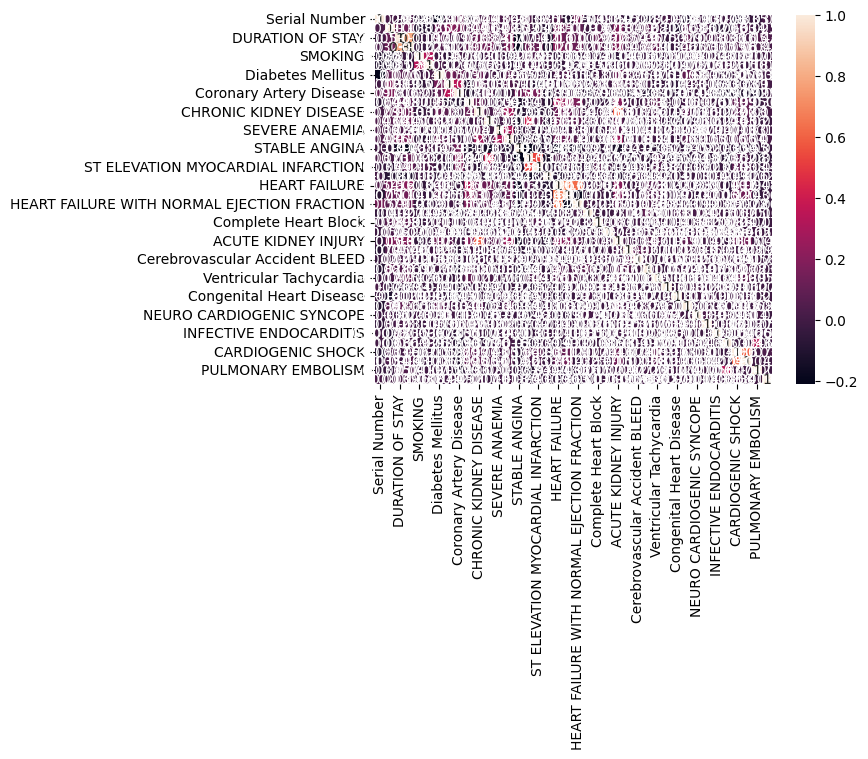

In [ ]:
# visualize the correlation using heatmap
# sns.heatmap(df4.corr(numeric_only = True), annot = True)

# plt.rcParams['figure.figsize'] = (100, 100)

# plt.show()

In [65]:
df4.select_dtypes(include='object')

,Admission Number,Date of Admission,Date of Discharge,GENDER,LOCALITY,TYPE OF ADMISSION-EMERGENCY/OPD,year month,OUTCOME,Haemoglobin,TOTAL LEUKOCYTES COUNT,PLATELETS,GLUCOSE,UREA,CREATININE,B-TYPE NATRIURETIC PEPTIDE,Ejection Fraction
0,234735,4/1/2017,4/3/2017,MALE,RURAL,EMERGENCY,2017-April,DISCHARGE,9.5,16.1,337,80,34,0.9,1880,35
1,234696,4/1/2017,4/5/2017,MALE,RURAL,EMERGENCY,2017-April,DISCHARGE,13.7,9,149,112,18,0.9,,42
2,234882,4/1/2017,4/3/2017,MALE,URBAN,EMERGENCY,2017-April,DISCHARGE,10.6,14.7,329,187,93,2.3,210,
3,234635,4/1/2017,4/8/2017,FEMALE,URBAN,EMERGENCY,2017-April,DISCHARGE,12.8,9.9,286,130,27,0.6,,42
4,234486,4/1/2017,4/23/2017,FEMALE,URBAN,EMERGENCY,2017-April,DISCHARGE,13.6,9.1,26,144,55,1.25,1840,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15752,699585,31/03/2019,04/04/2019,FEMALE,URBAN,OUTPATIENT,2019-March,DISCHARGE,8.8,13.7,361,131,57,1.4,292,38
15753,699500,3/31/2019,4/1/2019,MALE,RURAL,EMERGENCY,2019-March,EXPIRY,13.2,15.6,142,248,94,1.8,206,28
15754,700415,31/03/2019,09/04/2019,MALE,URBAN,EMERGENCY,2019-March,DISCHARGE,9.3,11.7,372,210,67,1.9,1120,32
15755,699524,31/03/2019,03/04/2019,FEMALE,URBAN,OUTPATIENT,2019-March,DISCHARGE,13.1,12.5,431,153,29,0.8,78,60


In [66]:
df4.select_dtypes(include='int64')

,Serial Number,AGE,DURATION OF STAY,duration of intensive unit stay,SMOKING,ALCOHOL,Diabetes Mellitus,Hypertension,Coronary Artery Disease,CARDIOMYOPATHY,CHRONIC KIDNEY DISEASE,RAISED CARDIAC ENZYMES,SEVERE ANAEMIA,ANAEMIA,STABLE ANGINA,Acute coronary Syndrome,ST ELEVATION MYOCARDIAL INFARCTION,ATYPICAL CHEST PAIN,HEART FAILURE,HEART FAILURE WITH REDUCED EJECTION FRACTION,HEART FAILURE WITH NORMAL EJECTION FRACTION,Valvular Heart Disease,Complete Heart Block,Sick sinus syndrome,ACUTE KIDNEY INJURY,Cerebrovascular Accident INFRACT,Cerebrovascular Accident BLEED,Atrial Fibrilation,Ventricular Tachycardia,PAROXYSMAL SUPRA VENTRICULAR TACHYCARDIA,Congenital Heart Disease,Urinary tract infection,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,Deep venous thrombosis,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM
0,1,81,3,2,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,65,5,2,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,53,3,3,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,67,8,6,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,60,23,9,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15752,15753,86,5,1,0,0,1,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15753,15754,50,2,2,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15754,15755,82,10,5,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15755,15756,59,4,2,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [67]:
df4_1 = df4.copy()
df4_2 = df4.copy()

In [68]:
df4_2

,Serial Number,Admission Number,Date of Admission,Date of Discharge,AGE,GENDER,LOCALITY,TYPE OF ADMISSION-EMERGENCY/OPD,year month,DURATION OF STAY,duration of intensive unit stay,OUTCOME,SMOKING,ALCOHOL,Diabetes Mellitus,Hypertension,Coronary Artery Disease,CARDIOMYOPATHY,CHRONIC KIDNEY DISEASE,Haemoglobin,TOTAL LEUKOCYTES COUNT,PLATELETS,GLUCOSE,UREA,CREATININE,B-TYPE NATRIURETIC PEPTIDE,RAISED CARDIAC ENZYMES,Ejection Fraction,SEVERE ANAEMIA,ANAEMIA,STABLE ANGINA,Acute coronary Syndrome,ST ELEVATION MYOCARDIAL INFARCTION,ATYPICAL CHEST PAIN,HEART FAILURE,HEART FAILURE WITH REDUCED EJECTION FRACTION,HEART FAILURE WITH NORMAL EJECTION FRACTION,Valvular Heart Disease,Complete Heart Block,Sick sinus syndrome,ACUTE KIDNEY INJURY,Cerebrovascular Accident INFRACT,Cerebrovascular Accident BLEED,Atrial Fibrilation,Ventricular Tachycardia,PAROXYSMAL SUPRA VENTRICULAR TACHYCARDIA,Congenital Heart Disease,Urinary tract infection,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,Deep venous thrombosis,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,1,234735,4/1/2017,4/3/2017,81,MALE,RURAL,EMERGENCY,2017-April,3,2,DISCHARGE,0,0,1,0,0,0,0,9.5,16.1,337,80,34,0.9,1880,1,35,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1,2,234696,4/1/2017,4/5/2017,65,MALE,RURAL,EMERGENCY,2017-April,5,2,DISCHARGE,0,1,0,1,1,0,0,13.7,9,149,112,18,0.9,,0,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0
2,3,234882,4/1/2017,4/3/2017,53,MALE,URBAN,EMERGENCY,2017-April,3,3,DISCHARGE,0,0,1,0,1,0,0,10.6,14.7,329,187,93,2.3,210,0,,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
3,4,234635,4/1/2017,4/8/2017,67,FEMALE,URBAN,EMERGENCY,2017-April,8,6,DISCHARGE,0,0,0,1,1,0,0,12.8,9.9,286,130,27,0.6,,0,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
4,5,234486,4/1/2017,4/23/2017,60,FEMALE,URBAN,EMERGENCY,2017-April,23,9,DISCHARGE,0,0,0,1,0,1,0,13.6,9.1,26,144,55,1.25,1840,0,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15752,15753,699585,31/03/2019,04/04/2019,86,FEMALE,URBAN,OUTPATIENT,2019-March,5,1,DISCHARGE,0,0,1,1,1,0,0,8.8,13.7,361,131,57,1.4,292,1,38,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
15753,15754,699500,3/31/2019,4/1/2019,50,MALE,RURAL,EMERGENCY,2019-March,2,2,EXPIRY,0,0,1,1,0,1,0,13.2,15.6,142,248,94,1.8,206,0,28,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
15754,15755,700415,31/03/2019,09/04/2019,82,MALE,URBAN,EMERGENCY,2019-March,10,5,DISCHARGE,0,0,0,1,1,0,0,9.3,11.7,372,210,67,1.9,1120,0,32,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
15755,15756,699524,31/03/2019,03/04/2019,59,FEMALE,URBAN,OUTPATIENT,2019-March,4,2,DISCHARGE,0,0,0,1,1,0,0,13.1,12.5,431,153,29,0.8,78,0,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


In [70]:
# be carefull when running this code it might break !!!!!!!!!!!!!!!!!!!!!!
# convert all columns into their respective datatypes
# datecolumn
def to_date(df, columns):
    for col in columns:
        df[col] = pd.to_datetime(df[col], errors='coerce', dayfirst=True)
        # df[col] = pd.to_datetime(df[col], errors='coerce', dayfirst=False)
    return df

date_columns = ['Date of Admission', 'Date of Discharge']

to_date(df4_1, date_columns)
# to_date(df4_2, date_columns)

,Serial Number,Admission Number,Date of Admission,Date of Discharge,AGE,GENDER,LOCALITY,TYPE OF ADMISSION-EMERGENCY/OPD,year month,DURATION OF STAY,duration of intensive unit stay,OUTCOME,SMOKING,ALCOHOL,Diabetes Mellitus,Hypertension,Coronary Artery Disease,CARDIOMYOPATHY,CHRONIC KIDNEY DISEASE,Haemoglobin,TOTAL LEUKOCYTES COUNT,PLATELETS,GLUCOSE,UREA,CREATININE,B-TYPE NATRIURETIC PEPTIDE,RAISED CARDIAC ENZYMES,Ejection Fraction,SEVERE ANAEMIA,ANAEMIA,STABLE ANGINA,Acute coronary Syndrome,ST ELEVATION MYOCARDIAL INFARCTION,ATYPICAL CHEST PAIN,HEART FAILURE,HEART FAILURE WITH REDUCED EJECTION FRACTION,HEART FAILURE WITH NORMAL EJECTION FRACTION,Valvular Heart Disease,Complete Heart Block,Sick sinus syndrome,ACUTE KIDNEY INJURY,Cerebrovascular Accident INFRACT,Cerebrovascular Accident BLEED,Atrial Fibrilation,Ventricular Tachycardia,PAROXYSMAL SUPRA VENTRICULAR TACHYCARDIA,Congenital Heart Disease,Urinary tract infection,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,Deep venous thrombosis,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,1,234735,2017-01-04,2017-03-04,81,MALE,RURAL,EMERGENCY,2017-April,3,2,DISCHARGE,0,0,1,0,0,0,0,9.5,16.1,337,80,34,0.9,1880,1,35,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1,2,234696,2017-01-04,2017-05-04,65,MALE,RURAL,EMERGENCY,2017-April,5,2,DISCHARGE,0,1,0,1,1,0,0,13.7,9,149,112,18,0.9,,0,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0
2,3,234882,2017-01-04,2017-03-04,53,MALE,URBAN,EMERGENCY,2017-April,3,3,DISCHARGE,0,0,1,0,1,0,0,10.6,14.7,329,187,93,2.3,210,0,,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
3,4,234635,2017-01-04,2017-08-04,67,FEMALE,URBAN,EMERGENCY,2017-April,8,6,DISCHARGE,0,0,0,1,1,0,0,12.8,9.9,286,130,27,0.6,,0,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
4,5,234486,2017-01-04,NaT,60,FEMALE,URBAN,EMERGENCY,2017-April,23,9,DISCHARGE,0,0,0,1,0,1,0,13.6,9.1,26,144,55,1.25,1840,0,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15752,15753,699585,2019-03-31,2019-04-04,86,FEMALE,URBAN,OUTPATIENT,2019-March,5,1,DISCHARGE,0,0,1,1,1,0,0,8.8,13.7,361,131,57,1.4,292,1,38,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
15753,15754,699500,NaT,2019-01-04,50,MALE,RURAL,EMERGENCY,2019-March,2,2,EXPIRY,0,0,1,1,0,1,0,13.2,15.6,142,248,94,1.8,206,0,28,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
15754,15755,700415,2019-03-31,2019-04-09,82,MALE,URBAN,EMERGENCY,2019-March,10,5,DISCHARGE,0,0,0,1,1,0,0,9.3,11.7,372,210,67,1.9,1120,0,32,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
15755,15756,699524,2019-03-31,2019-04-03,59,FEMALE,URBAN,OUTPATIENT,2019-March,4,2,DISCHARGE,0,0,0,1,1,0,0,13.1,12.5,431,153,29,0.8,78,0,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


In [71]:
df4_1[['Date of Admission', 'Date of Discharge']].isnull().sum()

Date of Admission    3767
Date of Discharge    3770
dtype: int64

In [72]:
df4_merged = df4_1.copy()
for col in ['Date of Admission', 'Date of Discharge']:
    df4_merged[col] = df4_1[col].combine_first(df4_2[col])

#### df4_merged[['Date of Admission', 'Date of Discharge']].isnull().sum()

In [73]:
df4['Date of Discharge'].isnull().sum()

np.int64(0)

In [74]:
df4_merged[df4_merged['Date of Discharge'].isna()]

,Serial Number,Admission Number,Date of Admission,Date of Discharge,AGE,GENDER,LOCALITY,TYPE OF ADMISSION-EMERGENCY/OPD,year month,DURATION OF STAY,duration of intensive unit stay,OUTCOME,SMOKING,ALCOHOL,Diabetes Mellitus,Hypertension,Coronary Artery Disease,CARDIOMYOPATHY,CHRONIC KIDNEY DISEASE,Haemoglobin,TOTAL LEUKOCYTES COUNT,PLATELETS,GLUCOSE,UREA,CREATININE,B-TYPE NATRIURETIC PEPTIDE,RAISED CARDIAC ENZYMES,Ejection Fraction,SEVERE ANAEMIA,ANAEMIA,STABLE ANGINA,Acute coronary Syndrome,ST ELEVATION MYOCARDIAL INFARCTION,ATYPICAL CHEST PAIN,HEART FAILURE,HEART FAILURE WITH REDUCED EJECTION FRACTION,HEART FAILURE WITH NORMAL EJECTION FRACTION,Valvular Heart Disease,Complete Heart Block,Sick sinus syndrome,ACUTE KIDNEY INJURY,Cerebrovascular Accident INFRACT,Cerebrovascular Accident BLEED,Atrial Fibrilation,Ventricular Tachycardia,PAROXYSMAL SUPRA VENTRICULAR TACHYCARDIA,Congenital Heart Disease,Urinary tract infection,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,Deep venous thrombosis,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
4692,4693,316112,2017-11-27,NaT,64,MALE,URBAN,EMERGENCY,2017-November,6,5,DISCHARGE,0,0,1,0,1,0,0,13.9,12.4,164,181,26,0.9,,1,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


In [75]:
df4_merged.iloc[4692]

Serial Number                                                  4693
Admission Number                                             316112
Date of Admission                               2017-11-27 00:00:00
Date of Discharge                                               NaT
AGE                                                              64
GENDER                                                         MALE
LOCALITY                                                      URBAN
TYPE OF ADMISSION-EMERGENCY/OPD                           EMERGENCY
year month                                            2017-November
DURATION OF STAY                                                  6
duration of intensive unit stay                                   5
OUTCOME                                                   DISCHARGE
SMOKING                                                           0
ALCOHOL                                                           0
Diabetes Mellitus                               

In [76]:
# df4.iloc[4692]

In [79]:
# df4_merged['Date of Discharge'].iloc[4692]
[df4.iloc[4692]]

[Serial Number                                            4693
 Admission Number                                       316112
 Date of Admission                                  11/27/2017
 Date of Discharge                                      2-1217
 AGE                                                        64
 GENDER                                                   MALE
 LOCALITY                                                URBAN
 TYPE OF ADMISSION-EMERGENCY/OPD                     EMERGENCY
 year month                                      2017-November
 DURATION OF STAY                                            6
 duration of intensive unit stay                             5
 OUTCOME                                             DISCHARGE
 SMOKING                                                     0
 ALCOHOL                                                     0
 Diabetes Mellitus                                           1
 Hypertension                                          

In [80]:
# filling out the date od discharge witht the correctd ate 
df4_merged.loc[4692, 'Date of Discharge'] = pd.to_datetime('2/12/2017', dayfirst=True)

In [81]:
df4_merged[['Date of Admission', 'Date of Discharge']].isnull().sum()

Date of Admission    0
Date of Discharge    0
dtype: int64

In [82]:
# re-assigning the df with fixed dates to df4
df4 = df4_merged.copy()

In [83]:
df4.select_dtypes(include='object')

,Admission Number,GENDER,LOCALITY,TYPE OF ADMISSION-EMERGENCY/OPD,year month,OUTCOME,Haemoglobin,TOTAL LEUKOCYTES COUNT,PLATELETS,GLUCOSE,UREA,CREATININE,B-TYPE NATRIURETIC PEPTIDE,Ejection Fraction
0,234735,MALE,RURAL,EMERGENCY,2017-April,DISCHARGE,9.5,16.1,337,80,34,0.9,1880,35
1,234696,MALE,RURAL,EMERGENCY,2017-April,DISCHARGE,13.7,9,149,112,18,0.9,,42
2,234882,MALE,URBAN,EMERGENCY,2017-April,DISCHARGE,10.6,14.7,329,187,93,2.3,210,
3,234635,FEMALE,URBAN,EMERGENCY,2017-April,DISCHARGE,12.8,9.9,286,130,27,0.6,,42
4,234486,FEMALE,URBAN,EMERGENCY,2017-April,DISCHARGE,13.6,9.1,26,144,55,1.25,1840,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15752,699585,FEMALE,URBAN,OUTPATIENT,2019-March,DISCHARGE,8.8,13.7,361,131,57,1.4,292,38
15753,699500,MALE,RURAL,EMERGENCY,2019-March,EXPIRY,13.2,15.6,142,248,94,1.8,206,28
15754,700415,MALE,URBAN,EMERGENCY,2019-March,DISCHARGE,9.3,11.7,372,210,67,1.9,1120,32
15755,699524,FEMALE,URBAN,OUTPATIENT,2019-March,DISCHARGE,13.1,12.5,431,153,29,0.8,78,60


In [84]:
# turning Haemoglobin and all the other columns into float
df4['Haemoglobin'] = pd.to_numeric(df4['Haemoglobin'], errors='coerce')
df4['TOTAL LEUKOCYTES COUNT'] = pd.to_numeric(df4['TOTAL LEUKOCYTES COUNT'], errors='coerce')
df4['PLATELETS'] = pd.to_numeric(df4['PLATELETS'], errors='coerce')
df4['GLUCOSE'] = pd.to_numeric(df4['GLUCOSE'], errors='coerce')
df4['UREA'] = pd.to_numeric(df4['UREA'], errors='coerce')
df4['CREATININE'] = pd.to_numeric(df4['CREATININE'], errors='coerce')
df4['B-TYPE NATRIURETIC PEPTIDE'] = pd.to_numeric(df4['B-TYPE NATRIURETIC PEPTIDE'], errors='coerce')
df4['Ejection Fraction'] = pd.to_numeric(df4['Ejection Fraction'], errors='coerce')

In [85]:
# df4[df4['Haemoglobin'].isna()]
# df4[df4['TOTAL LEUKOCYTES COUNT'].isna()]
df4['Haemoglobin'].isnull().sum()

np.int64(256)

In [86]:
df4['TOTAL LEUKOCYTES COUNT'].isnull().sum()

np.int64(290)

In [87]:
df4['PLATELETS'].isnull().sum()

np.int64(294)

In [88]:
df4['GLUCOSE'].isnull().sum()

np.int64(945)

In [89]:
df4['UREA'].isnull().sum()
df4[df4['UREA'].isna()]

,Serial Number,Admission Number,Date of Admission,Date of Discharge,AGE,GENDER,LOCALITY,TYPE OF ADMISSION-EMERGENCY/OPD,year month,DURATION OF STAY,duration of intensive unit stay,OUTCOME,SMOKING,ALCOHOL,Diabetes Mellitus,Hypertension,Coronary Artery Disease,CARDIOMYOPATHY,CHRONIC KIDNEY DISEASE,Haemoglobin,TOTAL LEUKOCYTES COUNT,PLATELETS,GLUCOSE,UREA,CREATININE,B-TYPE NATRIURETIC PEPTIDE,RAISED CARDIAC ENZYMES,Ejection Fraction,SEVERE ANAEMIA,ANAEMIA,STABLE ANGINA,Acute coronary Syndrome,ST ELEVATION MYOCARDIAL INFARCTION,ATYPICAL CHEST PAIN,HEART FAILURE,HEART FAILURE WITH REDUCED EJECTION FRACTION,HEART FAILURE WITH NORMAL EJECTION FRACTION,Valvular Heart Disease,Complete Heart Block,Sick sinus syndrome,ACUTE KIDNEY INJURY,Cerebrovascular Accident INFRACT,Cerebrovascular Accident BLEED,Atrial Fibrilation,Ventricular Tachycardia,PAROXYSMAL SUPRA VENTRICULAR TACHYCARDIA,Congenital Heart Disease,Urinary tract infection,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,Deep venous thrombosis,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
8,9,67070,2017-01-04,2017-03-04,65,FEMALE,URBAN,EMERGENCY,2017-April,3,3,EXPIRY,0,0,0,1,0,0,0,NaN,NaN,NaN,156.0,NaN,NaN,NaN,0,60.0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0.0
13,14,233403,2017-01-04,2017-02-04,44,MALE,URBAN,EMERGENCY,2017-April,2,2,EXPIRY,0,0,0,1,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,534.0,0,25.0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0
15,16,413903,2017-01-04,2017-05-04,50,MALE,RURAL,OUTPATIENT,2017-April,5,2,DISCHARGE,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
50,51,235557,2017-03-04,2017-03-04,70,MALE,URBAN,EMERGENCY,2017-April,1,1,DAMA,0,0,1,0,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,25.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
74,75,236928,2017-04-04,2017-05-04,50,MALE,URBAN,EMERGENCY,2017-April,2,2,EXPIRY,0,0,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,60.0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15503,15504,640103,2019-03-20,2019-03-20,64,MALE,URBAN,EMERGENCY,2019-March,1,0,EXPIRY,0,0,0,0,0,0,0,NaN,NaN,NaN,124.0,NaN,NaN,NaN,0,60.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
15510,15511,376566,2019-03-21,2019-03-22,64,MALE,URBAN,OUTPATIENT,2019-March,2,2,DISCHARGE,0,0,1,1,0,0,0,9.8,8.7,301.0,NaN,NaN,NaN,NaN,0,35.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
15511,15512,693083,2019-03-21,2019-04-02,52,MALE,RURAL,EMERGENCY,2019-March,13,4,DISCHARGE,0,0,0,1,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,32.0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
15562,15563,152167,2019-03-23,2019-03-23,61,MALE,URBAN,EMERGENCY,2019-March,1,0,EXPIRY,0,0,1,0,1,0,1,NaN,NaN,NaN,84.0,NaN,NaN,NaN,0,60.0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0


In [90]:
df4['CREATININE'].isnull().sum()

np.int64(251)

In [91]:
df4['B-TYPE NATRIURETIC PEPTIDE'].isnull().sum()

np.int64(9081)

In [92]:
df4['Ejection Fraction'].isnull().sum()

np.int64(1599)

In [93]:
df4.select_dtypes(include='object')

,Admission Number,GENDER,LOCALITY,TYPE OF ADMISSION-EMERGENCY/OPD,year month,OUTCOME
0,234735,MALE,RURAL,EMERGENCY,2017-April,DISCHARGE
1,234696,MALE,RURAL,EMERGENCY,2017-April,DISCHARGE
2,234882,MALE,URBAN,EMERGENCY,2017-April,DISCHARGE
3,234635,FEMALE,URBAN,EMERGENCY,2017-April,DISCHARGE
4,234486,FEMALE,URBAN,EMERGENCY,2017-April,DISCHARGE
...,...,...,...,...,...,...
15752,699585,FEMALE,URBAN,OUTPATIENT,2019-March,DISCHARGE
15753,699500,MALE,RURAL,EMERGENCY,2019-March,EXPIRY
15754,700415,MALE,URBAN,EMERGENCY,2019-March,DISCHARGE
15755,699524,FEMALE,URBAN,OUTPATIENT,2019-March,DISCHARGE


In [94]:
df4.select_dtypes(include='int')

,Serial Number,AGE,DURATION OF STAY,duration of intensive unit stay,SMOKING,ALCOHOL,Diabetes Mellitus,Hypertension,Coronary Artery Disease,CARDIOMYOPATHY,CHRONIC KIDNEY DISEASE,RAISED CARDIAC ENZYMES,SEVERE ANAEMIA,ANAEMIA,STABLE ANGINA,Acute coronary Syndrome,ST ELEVATION MYOCARDIAL INFARCTION,ATYPICAL CHEST PAIN,HEART FAILURE,HEART FAILURE WITH REDUCED EJECTION FRACTION,HEART FAILURE WITH NORMAL EJECTION FRACTION,Valvular Heart Disease,Complete Heart Block,Sick sinus syndrome,ACUTE KIDNEY INJURY,Cerebrovascular Accident INFRACT,Cerebrovascular Accident BLEED,Atrial Fibrilation,Ventricular Tachycardia,PAROXYSMAL SUPRA VENTRICULAR TACHYCARDIA,Congenital Heart Disease,Urinary tract infection,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,Deep venous thrombosis,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM
0,1,81,3,2,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,65,5,2,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,53,3,3,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,67,8,6,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,60,23,9,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15752,15753,86,5,1,0,0,1,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15753,15754,50,2,2,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15754,15755,82,10,5,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15755,15756,59,4,2,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [95]:
df4.dtypes

Serial Number                                            int64
Admission Number                                        object
Date of Admission                               datetime64[ns]
Date of Discharge                               datetime64[ns]
AGE                                                      int64
GENDER                                                  object
LOCALITY                                                object
TYPE OF ADMISSION-EMERGENCY/OPD                         object
year month                                              object
DURATION OF STAY                                         int64
duration of intensive unit stay                          int64
OUTCOME                                                 object
SMOKING                                                  int64
ALCOHOL                                                  int64
Diabetes Mellitus                                        int64
Hypertension                                           

In [96]:
columns = ['SMOKING', 'ALCOHOL', 'Diabetes Mellitus', 'Hypertension', 'Coronary Artery Disease', 
           'CARDIOMYOPATHY', 'CHRONIC KIDNEY DISEASE','RAISED CARDIAC ENZYMES', 'SEVERE ANAEMIA','ANAEMIA',
           'STABLE ANGINA','Acute coronary Syndrome','ST ELEVATION MYOCARDIAL INFARCTION',
           'ATYPICAL CHEST PAIN', 'HEART FAILURE','HEART FAILURE WITH REDUCED EJECTION FRACTION',
           'HEART FAILURE WITH NORMAL EJECTION FRACTION','Valvular Heart Disease','Complete Heart Block',
           'Sick sinus syndrome','ACUTE KIDNEY INJURY','Cerebrovascular Accident INFRACT', 
           'Cerebrovascular Accident BLEED','Atrial Fibrilation','Ventricular Tachycardia',               
           'PAROXYSMAL SUPRA VENTRICULAR TACHYCARDIA','Congenital Heart Disease','Urinary tract infection',                               
           'NEURO CARDIOGENIC SYNCOPE','ORTHOSTATIC', 'INFECTIVE ENDOCARDITIS','Deep venous thrombosis','CARDIOGENIC SHOCK',
           'SHOCK','PULMONARY EMBOLISM'
          ]

df4[columns] = df4[columns].astype(float)

In [97]:
df4[columns].nunique().astype(float)

SMOKING                                         2.0
ALCOHOL                                         2.0
Diabetes Mellitus                               2.0
Hypertension                                    2.0
Coronary Artery Disease                         2.0
CARDIOMYOPATHY                                  2.0
CHRONIC KIDNEY DISEASE                          2.0
RAISED CARDIAC ENZYMES                          2.0
SEVERE ANAEMIA                                  2.0
ANAEMIA                                         2.0
STABLE ANGINA                                   2.0
Acute coronary Syndrome                         2.0
ST ELEVATION MYOCARDIAL INFARCTION              2.0
ATYPICAL CHEST PAIN                             2.0
HEART FAILURE                                   2.0
HEART FAILURE WITH REDUCED EJECTION FRACTION    2.0
HEART FAILURE WITH NORMAL EJECTION FRACTION     2.0
Valvular Heart Disease                          2.0
Complete Heart Block                            2.0
Sick sinus s

Serial Number                                            int64
Admission Number                                        object
Date of Admission                               datetime64[ns]
Date of Discharge                               datetime64[ns]
AGE                                                      int64
GENDER                                                  object
LOCALITY                                                object
TYPE OF ADMISSION-EMERGENCY/OPD                         object
year month                                              object
DURATION OF STAY                                         int64
duration of intensive unit stay                          int64
OUTCOME                                                 object
SMOKING                                                float64
ALCOHOL                                                float64
Diabetes Mellitus                                      float64
Hypertension                                           

In [99]:
df4.to_csv("cleaned_Hospital_Admission_Data.csv", index=False )
